In [1]:
import pandas as pd

# Load the dataset
file_path = 'employee_attrition.csv'
employee_data = pd.read_csv(file_path)

# Prepare data
employee_data['tenure'] = employee_data['YearsAtCompany']
employee_data['event'] = employee_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# dropping useless columns : 'EmployeeCount','Over18'
employee_data.drop(columns=['EmployeeCount','Over18','StandardHours'],inplace=True)

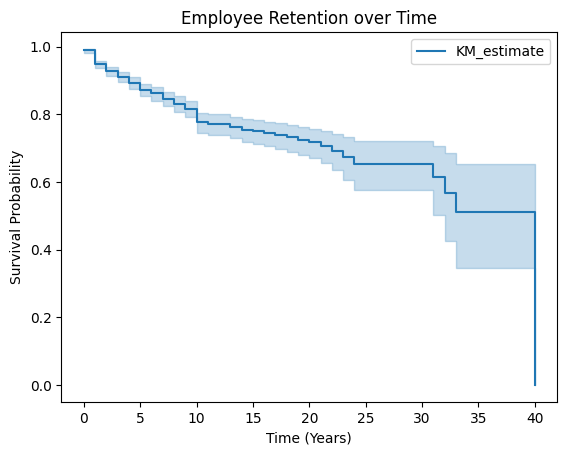

In [2]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=employee_data['tenure'], event_observed=employee_data['event'])

# Plot the survival function
kmf.plot_survival_function()
plt.title('Employee Retention over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

In [3]:
numerical_df = employee_data.select_dtypes(exclude='object')


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(numerical_df.drop(columns=[ 'event','tenure','YearsAtCompany']))  # Drop target and duration columns
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)




                    Variable         VIF
0                      const  205.239670
1                        Age    2.035370
2                  DailyRate    1.018523
3           DistanceFromHome    1.016404
4                  Education    1.061152
5             EmployeeNumber    1.019555
6    EnvironmentSatisfaction    1.010561
7                 HourlyRate    1.019066
8             JobInvolvement    1.013978
9                   JobLevel   11.208035
10           JobSatisfaction    1.015988
11             MonthlyIncome   10.795941
12               MonthlyRate    1.011265
13        NumCompaniesWorked    1.196540
14         PercentSalaryHike    2.515555
15         PerformanceRating    2.514046
16  RelationshipSatisfaction    1.018805
17          StockOptionLevel    1.021133
18         TotalWorkingYears    4.338607
19     TrainingTimesLastYear    1.010102
20           WorkLifeBalance    1.014537
21        YearsInCurrentRole    2.361102
22   YearsSinceLastPromotion    1.552954
23      YearsWit

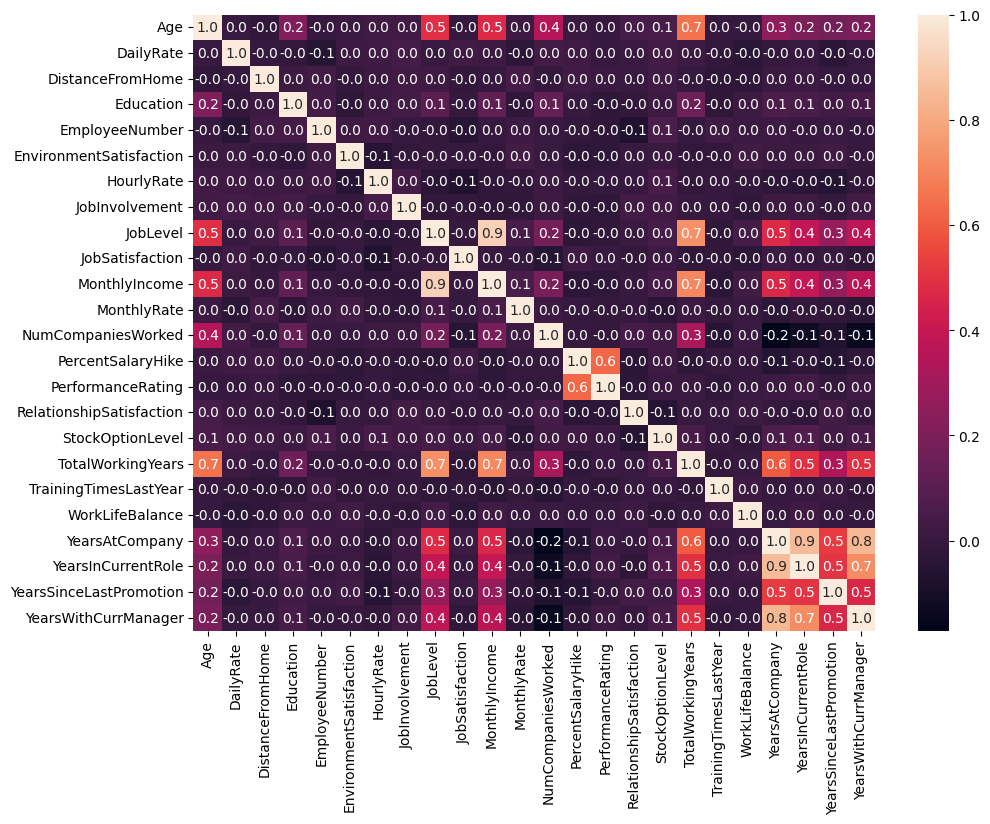

In [5]:
import seaborn as sns
import numpy as np


corr = numerical_df.drop(columns=[ 'event','tenure']).corr(method='spearman')
plt.figure(figsize=(11,8))
sns.heatmap(data=corr,annot = True,fmt = '.1f')
plt.show()

# Monthly Income vs JobLevel
# YearsAtCompany vs Years-related features(with WithCurrManager etc.)

In [6]:
def correlation_filter(df,threshold):
    for i in df.columns:
        for j in df.columns:
            if i < j and abs(df[i][j]) >= threshold:
                return (i,j)
correlation_filter(corr,0.9)

('JobLevel', 'MonthlyIncome')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'tenure'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1218.28
         time fit was run = 2024-07-25 05:30:02 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
Age                              -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
MonthlyIncome                    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
YearsInCurrentRole               -0.32      0.72      0.03           -0.39           -0.26                0.68                0.77
YearsWithCurrManager             -0.34      0.71      0.03           -0.40           -0.27                0.67                0.76
YearsSinceLastPromotion           0.03      1.03      0.03           -0.03            0.09                0.97                1.09
TotalWorkingYears                -0.11      0.89      0.03           -0.16           -0.06                0.85                0.94
TrainingTimesLastYear            -0.15      0.86      0.06           -0.26           -0.04                0.77                0.96
JobSatisfaction                  -0.36      0.70      0.06           -0.48           -0.24                0.62                0.78
RelationshipSatisfaction         -0.14      0.87      0.06           -0.27           -0.02                0.77                0.98
EnvironmentSatisfaction          -0.31      0.74      0.06           -0.43           -0.19                0.65                0.83
WorkLifeBalance                  -0.19      0.82      0.09           -0.37           -0.01                0.69                0.99
StockOptionLevel                 -0.16      0.85      0.13           -0.42            0.09                0.66                1.09
DistanceFromHome                  0.02      1.02      0.01            0.00            0.04                1.00                1.04
JobInvolvement                   -0.31      0.73      0.09           -0.49           -0.13                0.61                0.88
JobLevel                         -0.04      0.96      0.23           -0.49            0.41                0.61                1.51
Education                         0.04      1.04      0.06           -0.08            0.17                0.92                1.18
OverTime_Yes                      1.16      3.19      0.14            0.89            1.42                2.44                4.15
BusinessTravel_Travel_Frequently  1.40      4.05      0.33            0.75            2.05                2.12                7.76
BusinessTravel_Travel_Rarely      0.91      2.49      0.32            0.29            1.54                1.34                4.65
MaritalStatus_Married             0.17      1.18      0.22           -0.26            0.59                0.77                1.81
MaritalStatus_Single              0.81      2.26      0.27            0.29            1.34                1.33                3.83
Gender_Male                       0.31      1.36      0.14            0.03            0.58                1.03                1.79

                                  cmp to      z      p  -log2(p)
covariate                                                       
Age                                 0.00  -0.82   0.41      1.28
MonthlyIncome                       0.00  -0.97   0.33      1.58
YearsInCurrentRole                  0.00  -9.57 <0.005     69.63
YearsWithCurrManager                0.00 -10.20 <0.005     78.69
YearsSinceLastPromotion             0.00   0.98   0.32      1.62
TotalWorkingYears                   0

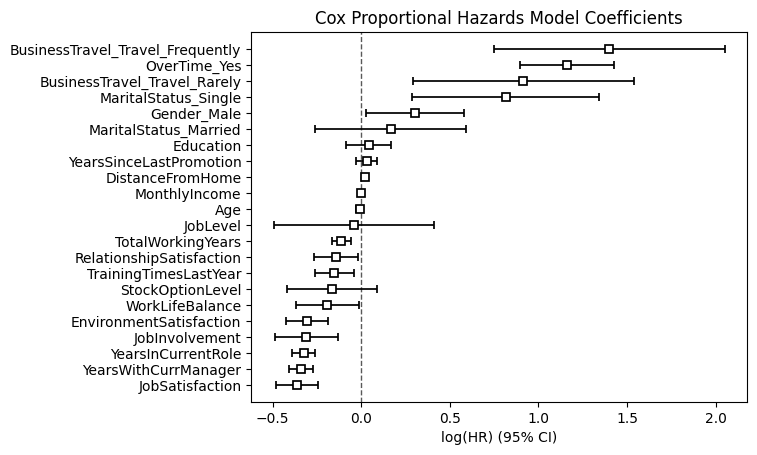

In [12]:
from lifelines import CoxPHFitter

# Select relevant columns
cox_data = employee_data[['tenure', 'event', 'Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion','TotalWorkingYears','TrainingTimesLastYear', 'JobSatisfaction', 'RelationshipSatisfaction','EnvironmentSatisfaction','OverTime','WorkLifeBalance','StockOptionLevel','BusinessTravel','MaritalStatus','DistanceFromHome','Gender','JobInvolvement','JobLevel','Education']]

# Encode categorical variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Initialize the Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the model
cph.fit(cox_data, duration_col='tenure', event_col='event')

# Print the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'tenure'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1328.57
         time fit was run = 2024-07-25 05:23:04 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
Age                     -0.02      0.98      0.01           -0.04            0.00                0.96                1.00
MonthlyIncome           -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
MonthlyRate              0.00      1.00      0.00           -0.00            0.00                1.00                1.00
HourlyRate              -0.00      1.00      0.00           -0.01            0.01                0.99                1.01
YearsWithCurrManager    -0.29      0.75      0.03           -0.35           -0.23                0.71                0.80
YearsInCurrentRole      -0.29      0.74      0.03           -0.36           -0.23                0.70                0.79
YearsSinceLastPromotion  0.04      1.04      0.03           -0.02            0.09                0.98                1.10
TotalWorkingYears       -0.10      0.91      0.03           -0.15           -0.05                0.86                0.95
TrainingTimesLastYear   -0.12      0.89      0.05           -0.23           -0.02                0.80                0.98

                         cmp to     z      p  -log2(p)
covariate                                             
Age                        0.00 -1.60   0.11      3.20
MonthlyIncome              0.00 -3.37 <0.005     10.37
MonthlyRate                0.00  1.00   0.32      1.65
HourlyRate                 0.00 -0.36   0.72      0.48
YearsWithCurrManager       0.00 -9.27 <0.005     65.57
YearsInCurrentRole         0.00 -9.48 <0.005     68.46
YearsSinceLastPromotion    0.00  1.20   0.23      2.12
TotalWorkingYears          0.00 -3.76 <0.005     12.52
TrainingTimesLastYear      0.00 -2.27   0.02      5.43
---
Concordance = 0.90
Partial AIC = 2675.14
log-likelihood ratio test = 491.11 on 9 df
-log2(p) of ll-ratio test = 329.99

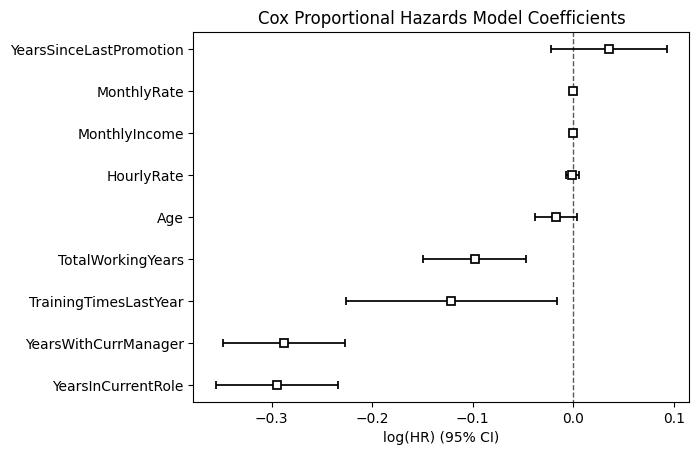

In [8]:
# Select relevant columns
cox_data = employee_data[['tenure', 'event', 'Age','MonthlyIncome','MonthlyRate','HourlyRate','YearsWithCurrManager','YearsInCurrentRole','YearsSinceLastPromotion','TotalWorkingYears','TrainingTimesLastYear']]

# Encode categorical variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Initialize the Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the model
cph.fit(cox_data, duration_col='tenure', event_col='event')

# Print the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()

In [9]:
employee_data['tenure']

0        6
1       10
2        0
3        8
4        2
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: tenure, Length: 1470, dtype: int64

c:\Users\User\envs\jupyternb\lib\site-packages\lifelines\fitters\coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.687. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'tenure'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1155.51
         time fit was run = 2024-07-25 05:23:04 UTC

---
                                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                          
Age                               -0.02      0.98      0.01           -0.04            0.00                0.96                1.00
DailyRate                         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
DistanceFromHome                   0.03      1.03      0.01            0.01            0.04                1.01                1.04
Education                          0.01      1.01      0.07           -0.12            0.14                0.88                1.15
EmployeeNumber                    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
EnvironmentSatisfaction           -0.31      0.74      0.06           -0.43           -0.18                0.65                0.83
HourlyRate                         0.00      1.00      0.00           -0.00            0.01                1.00                1.01
JobInvolvement                    -0.26      0.77      0.09           -0.43           -0.08                0.65                0.92
JobLevel                          -0.08      0.93      0.27           -0.60            0.45                0.55                1.57
JobSatisfaction                   -0.37      0.69      0.06           -0.49           -0.24                0.61                0.79
MonthlyIncome                     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
MonthlyRate                        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
NumCompaniesWorked                 0.25      1.29      0.03            0.19            0.31                1.21                1.36
PercentSalaryHike                  0.00      1.00      0.03           -0.06            0.06                0.95                1.07
PerformanceRating                 -0.03      0.97      0.31           -0.65            0.58                0.52                1.78
RelationshipSatisfaction          -0.21      0.81      0.07           -0.34           -0.08                0.71                0.92
StockOptionLevel                  -0.20      0.82      0.13           -0.45            0.05                0.64                1.05
TotalWorkingYears                 -0.15      0.86      0.03           -0.21           -0.09                0.81                0.91
TrainingTimesLastYear             -0.21      0.81      0.06           -0.33           -0.09                0.72                0.91
WorkLifeBalance                   -0.15      0.86      0.09           -0.34            0.03                0.71                1.03
YearsInCurrentRole                -0.34      0.71      0.04           -0.41           -0.27                0.66                0.76
YearsSinceLastPromotion            0.06      1.06      0.03           -0.01            0.12                0.99                1.13
YearsWithCurrManager              -0.34      0.71      0.04           -0.41           -0.27                0.67                0.77
BusinessTravel_Travel_Frequently   1.40      4.06      0.34            0.72            2.08                2.06                7.97
BusinessTravel_Travel_Rarely       0.86      2.36      0.33            0.22            1.50                1.24                4.48
Department_Research & Development 15.40  4.87e+06   1622.95        -3165.

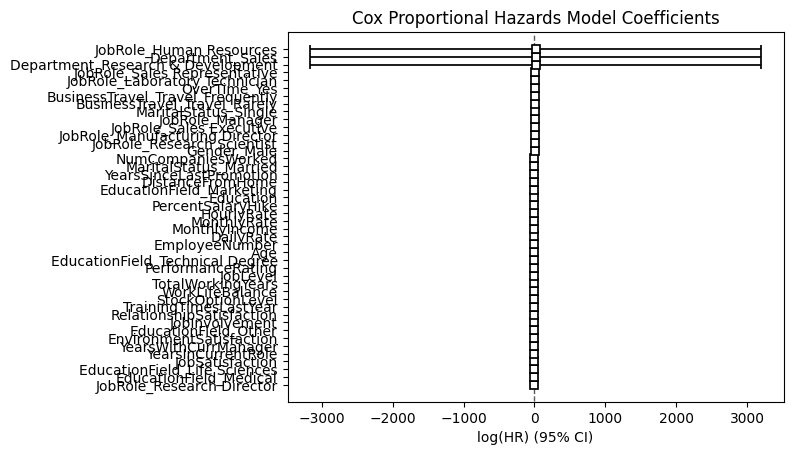

In [10]:
excluded = ['YearsAtCompany','Attrition']

# Select relevant columns
cox_data = employee_data.drop(columns=excluded)

# Encode categorical variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Initialize the Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the model
cph.fit(cox_data, duration_col='tenure', event_col='event')

# Print the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()